In [859]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1168]:
df = pd.read_csv(r"C:\Users\V.MANOHAR\OneDrive\Documents\Data.csv")

In [1169]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [1170]:
df.shape

(45213, 19)

## Replacing Missing values 

In [1171]:
missing_val = ['n/a','-','?',' ']
df = pd.read_csv(r'C:\Users\V.MANOHAR\OneDrive\Documents\Data.csv',na_values = missing_val)
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


## Changing Column names

In [1172]:
df.columns

Index(['banking marketing', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [1173]:
df.columns=['customer_id','age','salary','balance','marital','jobedu','targeted','default','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','response']

In [1174]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


## Dropping unnecessary Rows

In [1175]:
df.drop([0,1], inplace = True)

In [1176]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Reset Index

In [1177]:
df = df.reset_index()

In [1178]:
df.head()

,index,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Deleting unnecessary index column

In [1179]:
del df['index']

In [1180]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Treating Missing values

In [1181]:
df.isnull().sum()

customer_id     0
age            20
salary         62
balance         0
marital         0
jobedu          0
targeted        0
default         0
housing         0
loan            0
contact         0
day             0
month          50
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
response       30
dtype: int64

In [1182]:
df.isnull().any(axis=0)

customer_id    False
age             True
salary          True
balance        False
marital        False
jobedu         False
targeted       False
default        False
housing        False
loan           False
contact        False
day            False
month           True
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
response        True
dtype: bool

In [1183]:
df.isnull().all(axis=0)

customer_id    False
age            False
salary         False
balance        False
marital        False
jobedu         False
targeted       False
default        False
housing        False
loan           False
contact        False
day            False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
response       False
dtype: bool

In [1184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  45211 non-null  object
 1   age          45191 non-null  object
 2   salary       45149 non-null  object
 3   balance      45211 non-null  object
 4   marital      45211 non-null  object
 5   jobedu       45211 non-null  object
 6   targeted     45211 non-null  object
 7   default      45211 non-null  object
 8   housing      45211 non-null  object
 9   loan         45211 non-null  object
 10  contact      45211 non-null  object
 11  day          45211 non-null  object
 12  month        45161 non-null  object
 13  duration     45211 non-null  object
 14  campaign     45211 non-null  object
 15  pdays        45211 non-null  object
 16  previous     45211 non-null  object
 17  poutcome     45211 non-null  object
 18  response     45181 non-null  object
dtypes: object(19)
memory usag

In [1185]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

## using fillna() function

In [1186]:
round(100*(df.isnull().sum()/len(df.index)), 2)

customer_id    0.00
age            0.04
salary         0.14
balance        0.00
marital        0.00
jobedu         0.00
targeted       0.00
default        0.00
housing        0.00
loan           0.00
contact        0.00
day            0.00
month          0.11
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
poutcome       0.00
response       0.07
dtype: float64

In [1187]:
df.age.value_counts()

32      1509
31      1487
33      1393
35      1359
34      1351
        ... 
80         2
94         1
86         1
90         1
90.0       1
Name: age, Length: 144, dtype: int64

In [1188]:
df.salary.value_counts()

20000       7290
60000       7036
100000      6890
50000       3517
70000       3078
100000.0    2568
20000.0     2442
60000.0     2140
50000.0     1654
55000       1267
120000      1189
70000.0     1076
55000.0      997
16000        987
8000         972
4000.0       620
8000.0       331
4000         318
120000.0     298
16000.0      253
0            174
0.0           52
Name: salary, dtype: int64

In [1189]:
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [1190]:
df.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [1191]:
df['age'].fillna(0,inplace=True)
df['salary'].fillna(0,inplace=True)
df['month'].fillna('Not define',inplace=True)
df['response'].fillna('Not define',inplace = True)

In [1192]:
round(100*(df.isnull().sum()/len(df.index)), 2)

customer_id    0.0
age            0.0
salary         0.0
balance        0.0
marital        0.0
jobedu         0.0
targeted       0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
day            0.0
month          0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
response       0.0
dtype: float64

## Regex

In [1193]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [1194]:
regex=r'\w+.,'
df['JOB'] = df['jobedu'].apply(lambda x : re.compile(regex).findall(x))

In [1195]:
df.JOB = df.JOB.apply(lambda x : ''.join(x))

In [1196]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,JOB
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,"management,"
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,"technician,"
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,"entrepreneur,"
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,"collar,"
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,"unknown,"


In [1197]:
regex=r',\w+'
df['Edu'] = df['jobedu'].apply(lambda x : re.compile(regex).findall(x))

In [1198]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,JOB,Edu
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,"management,","[,tertiary]"
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,"technician,","[,secondary]"
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,"entrepreneur,","[,secondary]"
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,"collar,","[,unknown]"
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,"unknown,","[,unknown]"


In [1199]:
df.Edu = df.Edu.apply(lambda x : ''.join(x))

In [1200]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,JOB,Edu
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,"management,",",tertiary"
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,"technician,",",secondary"
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,"entrepreneur,",",secondary"
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,"collar,",",unknown"
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,"unknown,",",unknown"


In [1201]:
df.JOB = df['JOB'].str.replace(',','')

In [1202]:
df.Edu=df['Edu'].str.replace(',','')

In [1203]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,JOB,Edu
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,collar,unknown
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [1204]:
regex = r'^\w+'

df['Month'] = df['month'].apply(lambda x : re.compile(regex).findall(x))

In [1205]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,[may]
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,[may]
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,[may]
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",92 sec,1,-1,0,unknown,no,collar,unknown,[may]
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,[may]


In [1206]:
regex = r'\d+'

df['Year'] = df['month'].apply(lambda x : re.compile(regex).findall(x))

In [1207]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261 sec,1,-1,0,unknown,no,management,tertiary,[may],[2017]
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,151 sec,1,-1,0,unknown,no,technician,secondary,[may],[2017]
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,[may],[2017]
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92 sec,1,-1,0,unknown,no,collar,unknown,[may],[2017]
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,198 sec,1,-1,0,unknown,no,unknown,unknown,[may],[2017]


In [1208]:
df.Month = df.Month.apply(lambda x : ''.join(x))
df.Year = df.Year.apply(lambda x : ''.join(x))

In [1209]:
df.head()

,customer_id,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92 sec,1,-1,0,unknown,no,collar,unknown,may,2017
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


In [1210]:
del df['jobedu']

In [1211]:
del df['month']

In [1212]:
df.head()

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47,20000,1506,married,no,no,yes,no,unknown,...,92 sec,1,-1,0,unknown,no,collar,unknown,may,2017
4,5,33,0,1,single,no,no,no,no,unknown,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


## Replacing unknown to NaN

In [1213]:
df.JOB=df.JOB.apply(lambda x:str(x).replace('unknown','NaN'))
df.Edu=df.Edu.apply(lambda x:str(x).replace('unknown','NaN'))
df.Month=df.Month.apply(lambda x:str(x).replace('unknown','NaN'))
df.Year=df.Year.apply(lambda x:str(x).replace('unknown','NaN'))

In [1214]:
df.head(20)

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47,20000,1506,married,no,no,yes,no,unknown,...,92 sec,1,-1,0,unknown,no,collar,NaN,may,2017
4,5,33,0,1,single,no,no,no,no,unknown,...,198 sec,1,-1,0,unknown,no,NaN,NaN,may,2017
5,6,35,100000,231,married,yes,no,yes,no,unknown,...,139 sec,1,-1,0,unknown,no,management,tertiary,may,2017
6,7,28,100000,447,single,no,no,yes,yes,unknown,...,217 sec,1,-1,0,unknown,no,management,tertiary,may,2017
7,8,42,120000,2,divorced,no,yes,yes,no,unknown,...,380 sec,1,-1,0,unknown,no,entrepreneur,tertiary,may,2017
8,9,58,55000,121,married,yes,no,yes,no,unknown,...,50 sec,1,-1,0,unknown,no,retired,primary,may,2017
9,10,43,60000,593,single,yes,no,yes,no,unknown,...,55 sec,1,-1,0,unknown,no,technician,secondary,may,2017


In [1215]:
df.isnull().sum()

customer_id    0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
JOB            0
Edu            0
Month          0
Year           0
dtype: int64

## Removing NaN values

In [1216]:
df = df[df.JOB != 'NaN']
df = df[df.Edu != 'NaN']
df = df[df.Month != 'NaN']
df = df[df.Year != 'NaN']


In [1217]:
df.head(20)

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
5,6,35,100000,231,married,yes,no,yes,no,unknown,...,139 sec,1,-1,0,unknown,no,management,tertiary,may,2017
6,7,28,100000,447,single,no,no,yes,yes,unknown,...,217 sec,1,-1,0,unknown,no,management,tertiary,may,2017
7,8,42,120000,2,divorced,no,yes,yes,no,unknown,...,380 sec,1,-1,0,unknown,no,entrepreneur,tertiary,may,2017
8,9,58,55000,121,married,yes,no,yes,no,unknown,...,50 sec,1,-1,0,unknown,no,retired,primary,may,2017
9,10,43,60000,593,single,yes,no,yes,no,unknown,...,55 sec,1,-1,0,unknown,no,technician,secondary,may,2017
10,11,41,50000,270,divorced,yes,no,yes,no,unknown,...,222 sec,1,-1,0,unknown,no,admin.,secondary,may,2017
11,12,29,50000,390,single,yes,no,yes,no,unknown,...,137 sec,1,-1,0,unknown,no,admin.,secondary,may,2017


In [1218]:
df.shape

(43193, 21)

## Converting Duration to Float type

In [1219]:
duration_1=[]
for x in df['duration']:
    X=[x.split(' ')[0]]
    duration_1.append(X)

In [1220]:
duration_1

[['261'],
 ['151'],
 ['76'],
 ['139'],
 ['217'],
 ['380'],
 ['50'],
 ['55'],
 ['222'],
 ['137'],
 ['517'],
 ['174'],
 ['353'],
 ['38'],
 ['219'],
 ['54'],
 ['262'],
 ['164'],
 ['160'],
 ['342'],
 ['181'],
 ['172'],
 ['296'],
 ['127'],
 ['255'],
 ['348'],
 ['225'],
 ['230'],
 ['208'],
 ['226'],
 ['336'],
 ['242'],
 ['365'],
 ['1666'],
 ['577'],
 ['137'],
 ['160'],
 ['180'],
 ['1492'],
 ['242'],
 ['355'],
 ['225'],
 ['160'],
 ['363'],
 ['266'],
 ['253'],
 ['179'],
 ['787'],
 ['145'],
 ['174'],
 ['104'],
 ['1778'],
 ['138'],
 ['812'],
 ['164'],
 ['391'],
 ['91'],
 ['528'],
 ['273'],
 ['158'],
 ['177'],
 ['258'],
 ['172'],
 ['154'],
 ['291'],
 ['181'],
 ['176'],
 ['211'],
 ['349'],
 ['272'],
 ['208'],
 ['193'],
 ['212'],
 ['20'],
 ['1042'],
 ['246'],
 ['529'],
 ['1467'],
 ['1389'],
 ['188'],
 ['180'],
 ['48'],
 ['213'],
 ['583'],
 ['173'],
 ['426'],
 ['287'],
 ['101'],
 ['203'],
 ['197'],
 ['257'],
 ['124'],
 ['229'],
 ['55'],
 ['400'],
 ['197'],
 ['190'],
 ['21'],
 ['514'],
 ['849'],
 ['1

In [1221]:
df['Duration'] = np.array(duration_1).astype(float)

In [1222]:
df.head()

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,JOB,Edu,Month,Year,Duration
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,management,tertiary,may,2017,261.0
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,technician,secondary,may,2017,151.0
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,1,-1,0,unknown,no,entrepreneur,secondary,may,2017,76.0
5,6,35,100000,231,married,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,management,tertiary,may,2017,139.0
6,7,28,100000,447,single,no,no,yes,yes,unknown,...,1,-1,0,unknown,no,management,tertiary,may,2017,217.0


## Outlier Treatment

In [1100]:
df.age= df.age.astype(int)
df.salary = df.salary.astype(int)
df.balance = df.balance.astype(int)
df.day = df.day.astype(int)
df.previous = df.previous.astype(int)

<AxesSubplot:xlabel='age'>

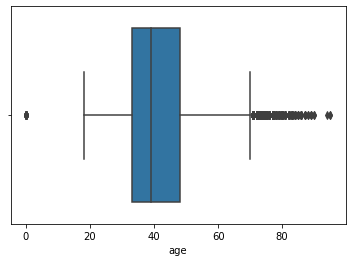

In [1016]:
sns.boxplot(data=df,x='age')

In [1017]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker)
print(Upper_Whisker)

33.0
48.0
15.0
10.5
70.5


In [1018]:
df = df[df['age'] > Lower_Whisker]

In [1019]:
df = df[df['age']< Upper_Whisker]

<AxesSubplot:xlabel='age'>

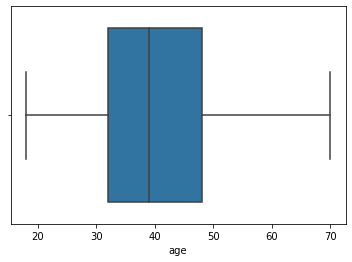

In [1020]:
sns.boxplot(data=df,x='age')

## No Outliers in Salary Column

<AxesSubplot:xlabel='salary'>

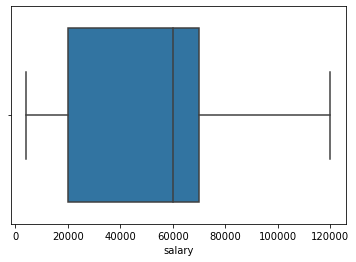

In [1021]:
sns.boxplot(data=df,x='salary')

<AxesSubplot:xlabel='balance'>

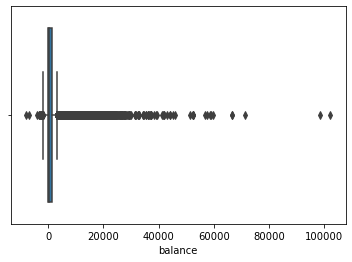

In [1022]:
sns.boxplot(data=df,x='balance')

In [1023]:
Q1=df['balance'].quantile(0.25)
Q3=df['balance'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker)
print(Upper_Whisker)

69.0
1397.0
1328.0
-1923.0
3389.0


In [1024]:
df = df[df['balance'] > Lower_Whisker]

In [1025]:
df = df[df['balance']< Upper_Whisker]

<AxesSubplot:xlabel='balance'>

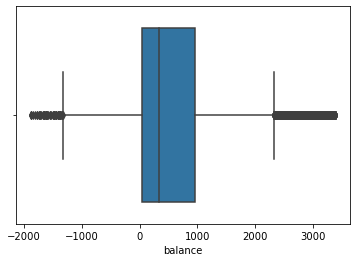

In [1026]:
sns.boxplot(data=df,x='balance')

## No Outliers in day Column

<AxesSubplot:xlabel='day'>

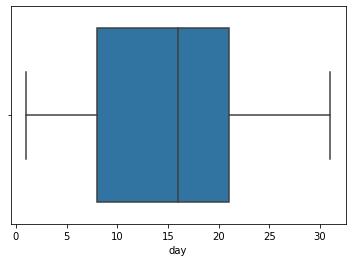

In [1027]:
sns.boxplot(data=df,x='day')

## EDA

In [1101]:
df.head()

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,response,JOB,Edu,Month,Year,Duration
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,no,management,tertiary,may,2017,261.0
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,no,technician,secondary,may,2017,151.0
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,no,entrepreneur,secondary,may,2017,76.0
5,6,35,100000,231,married,yes,no,yes,no,unknown,...,139 sec,1,-1,0,no,management,tertiary,may,2017,139.0
6,7,28,100000,447,single,no,no,yes,yes,unknown,...,217 sec,1,-1,0,no,management,tertiary,may,2017,217.0


In [1106]:
df.salary.max()

120000

In [1103]:
df.salary.min()

4000

In [1107]:
df.shape

(43193, 21)

In [1108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  43193 non-null  object 
 1   age          43193 non-null  int32  
 2   salary       43193 non-null  int32  
 3   balance      43193 non-null  int32  
 4   marital      43193 non-null  object 
 5   targeted     43193 non-null  object 
 6   default      43193 non-null  object 
 7   housing      43193 non-null  object 
 8   loan         43193 non-null  object 
 9   contact      43193 non-null  object 
 10  day          43193 non-null  int32  
 11  duration     43193 non-null  object 
 12  campaign     43193 non-null  object 
 13  pdays        43193 non-null  object 
 14  previous     43193 non-null  int32  
 15  response     43193 non-null  object 
 16  JOB          43193 non-null  object 
 17  Edu          43193 non-null  object 
 18  Month        43193 non-null  object 
 19  Year

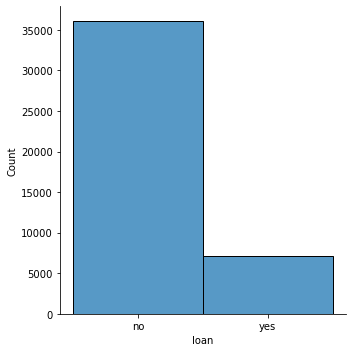

In [1110]:
sns.displot(data=df,x='loan')

## This plot shows that maximum number of customers doesnt take any loan

<AxesSubplot:xlabel='JOB', ylabel='count'>

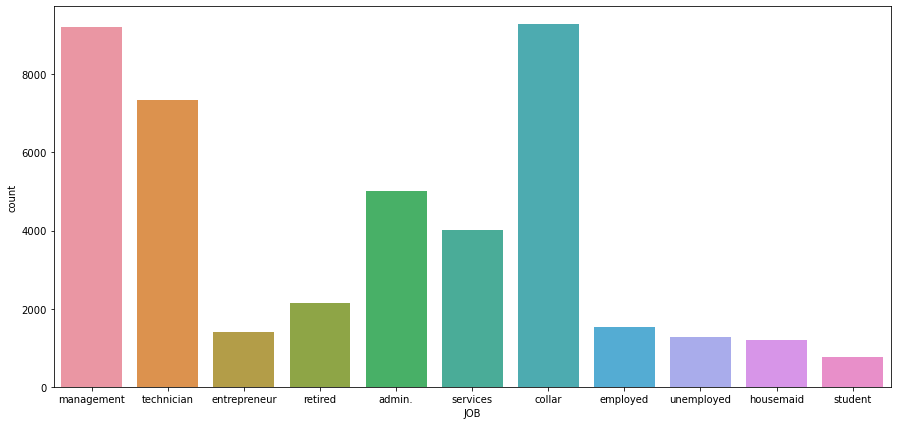

In [1121]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='JOB')

## This plot shows that maximum customers comes under management, collar and technician jobs and least were student, housemaid

<AxesSubplot:xlabel='marital', ylabel='Count'>

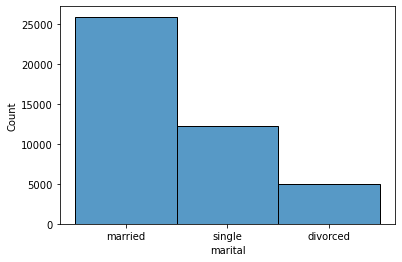

In [1125]:
sns.histplot(data=df,x='marital')

## This plot shows that maximum customers were married and least were divorced customers

<AxesSubplot:xlabel='contact', ylabel='count'>

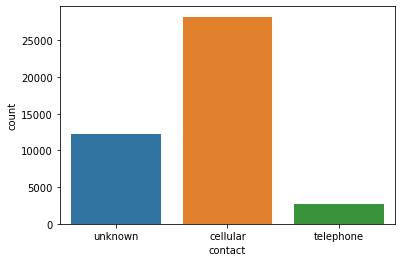

In [1126]:
sns.countplot(data=df,x='contact')

## Contacting customers making higest through cellular and least through telephone

<AxesSubplot:xlabel='response', ylabel='count'>

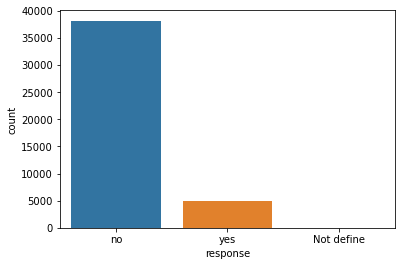

In [1128]:
sns.countplot(data=df,x='response')

## There is no response from maximum customers for term deposit

<AxesSubplot:xlabel='salary', ylabel='age'>

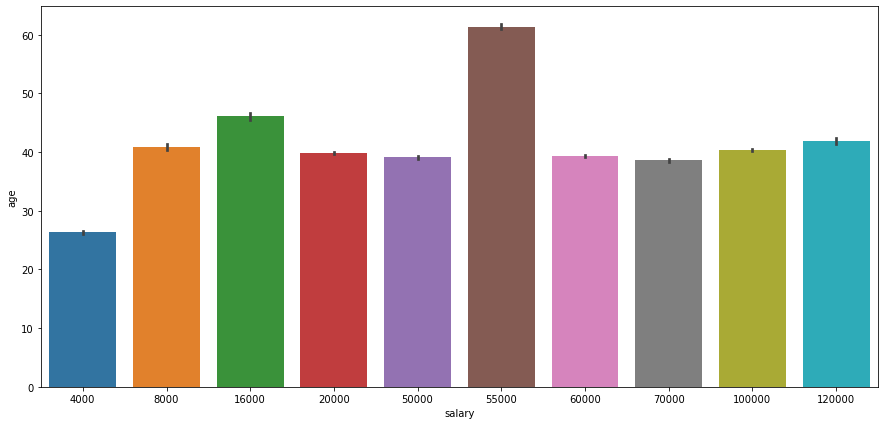

In [1131]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='salary',y='age')

## This plot shows that the customers having Higest salary for 60 aged people and least were the 25 aged people

<AxesSubplot:xlabel='salary', ylabel='targeted'>

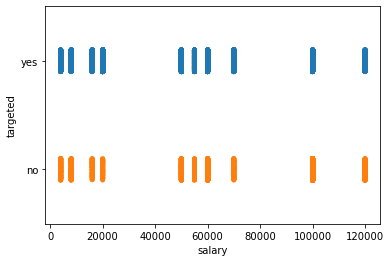

In [1142]:
sns.stripplot(data=df,x='salary',y='targeted')

## Having more response from people who are earning 60000 salary

<AxesSubplot:xlabel='targeted', ylabel='age'>

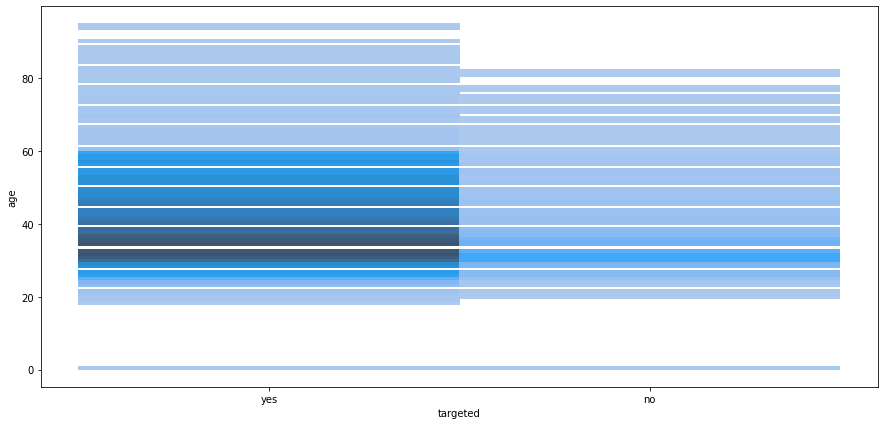

In [1152]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='targeted',y='age')

## This plot shows that bank will target more from 25 aged customers to 80 aged customers

<AxesSubplot:xlabel='marital', ylabel='salary'>

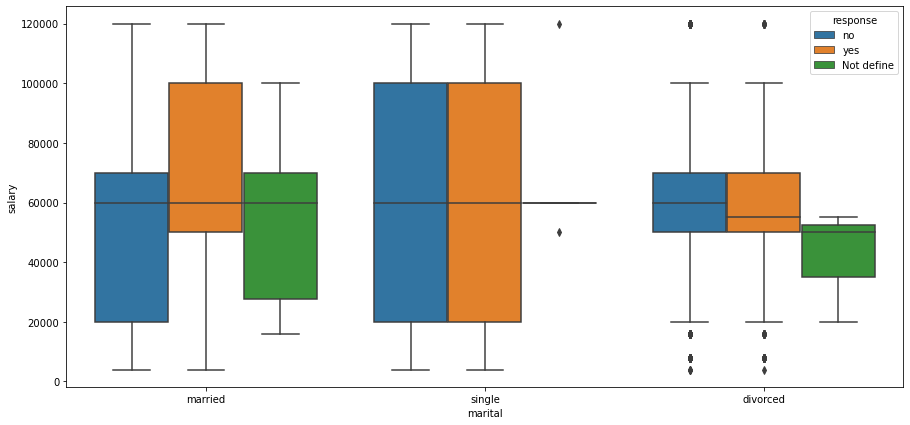

In [1156]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='marital',y='salary',hue='response')

## This plot shows that Customers who are married and having higest salary are intrested in term deposit

<AxesSubplot:xlabel='response', ylabel='Duration'>

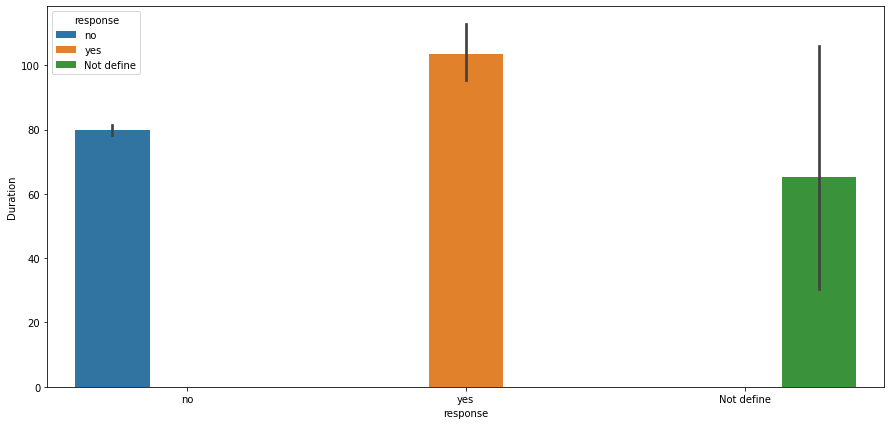

In [1161]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='response',y='Duration',hue='response')

## This plot shows that If call duration is more than the response of acceptance is high

<AxesSubplot:xlabel='loan', ylabel='balance'>

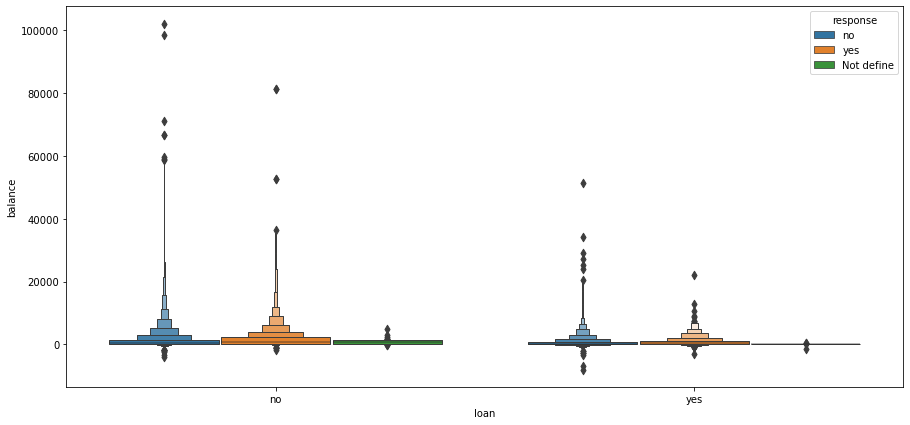

In [1165]:
plt.figure(figsize=(15,7))
sns.boxenplot(data=df,x='loan',y='balance',hue='response')

## This plot shows that Customers with no loan are accepting and customers with loan and having balance are accepting

<AxesSubplot:ylabel='response'>

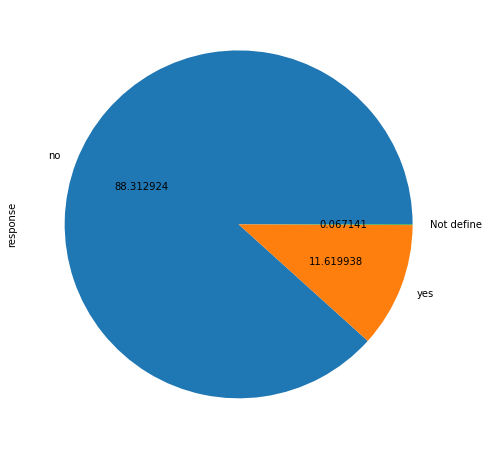

In [1166]:
df.response.value_counts().plot(kind='pie',autopct='%2f',figsize = (8,8))

## This plot shows finally there is no response from maximum customers about term deposit

## Chi Square Test

In [1167]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [1223]:
pd.crosstab(df['poutcome'], df['response'], margins=True)

response,Not define,no,yes,All
poutcome,,,,
failure,4,4118,587,4709
other,1,1480,293,1774
success,1,506,917,1424
unknown,23,32041,3222,35286
All,29,38145,5019,43193


In [1225]:
observed = pd.crosstab(df['poutcome'], df['response'])
observed

response,Not define,no,yes
poutcome,,,
failure,4,4118,587
other,1,1480,293
success,1,506,917
unknown,23,32041,3222


In [1226]:
chi2_contingency(observed)

(4120.38098944058,
 0.0,
 6,
 array([[3.16164656e+00, 4.15865545e+03, 5.47182900e+02],
        [1.19107263e+00, 1.56667122e+03, 2.06137707e+02],
        [9.56080846e-01, 1.25757600e+03, 1.65467923e+02],
        [2.36912000e+01, 3.11620973e+04, 4.10021147e+03]]))

In [1227]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
dof = chi2_contingency(observed)[2]

In [1228]:
alpha = 1 - 0.90

chi2_critical = chi2.ppf(1 - alpha, dof)

chi2_critical

10.644640675668422

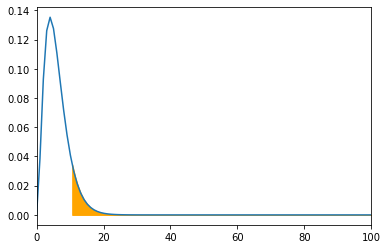

In [1229]:
x_min = 0
x_max = 100
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)
chi2_critical_right = chi2_critical
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, dof)
plt.fill_between(x1, y1, color='orange')

In [1230]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [1231]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
